# Unit 01 Project: Mortar Trajectory

For our second project this semester, I decided to model Mortar Trajectory because I have always been fascinated in trajectory physics and a good simulation would be with Mortars! I used ODE solvers to determine the postion & velocity of the mortar in each time step from its launch. The user of the program will also have the choice to change the starting speed as well as the angle on launch.

#### For my ODE's, I am using these 3 to solve for the linear motion of the mortars's X and Y and Z positions and velocites.

$$\frac{dx}{dt} = v_x \qquad \frac{dy}{dt} = v_y \qquad \frac{dz}{dt} = v_z$$

$$\frac{d v_x}{dt} = \frac{F_{net,x}}{m} \qquad \frac{d v_y}{dt} = \frac{F_{net,y}}{m} \qquad \frac{d v_y}{dt} = \frac{F_{net,y}}{m}$$

For our x-velocity/position, we will be simulating air resistence in the x-direction as our opposing force. Meanwhile our y velocity/position would be affected by the force of gravity by earth as well as air resistence in the y-direction. Our z-velocity/direction is just there. Now lets get to the code shall we!?

## The Code

*P.S: All markdown pieces of text describe the block of code above them*

In [3]:
import compy.ode as ode
#import ode #incase compy.ode does not work for your computer 
import numpy as np
import matplotlib.pyplot as plt

First we are doing our import statements, half of our program would not work without them! Feel free to execute this block of code to follow along, It is indeed functional!

In [2]:
#independent variables
m = 20 
g = 9.8 #N/kg 
Fnety = m * g
thetadeg = input("Enter an angle of launch(will be comverted to Radians): ")
theta0 = int(thetadeg)*(np.pi/180) 
Cdrag = 0.5 #drag coefficeint
r = (81e-3)/2 #81 mm radius for presicion mortar
A = np.pi*r**2 #area of mortar 
rho = 1.2 #kg/m^3
b2 = 1/2*Cdrag*rho*A #drag with wind resistance
vmag0mph = input("Enter a launch speed(will be converted to m/s): ") #mph
vmag0 = int(vmag0mph) * 0.44704 #convert to m/s

#dependent variables
x0 = 0
vx0 = vmag0*np.cos(theta0) 
y0 = 30
vy0 = vmag0*np.sin(theta0)
z0 = 0
vz0 = 0

data = np.array([x0,y0,z0,vx0,vy0,vz0]) #initialize dependent variables

#independent variable/time stuff
t = 0
h = 0.01
Nsteps = int(30/h) #N steps for N seconds of evolution

Enter an angle of launch(will be comverted to Radians): 80
Enter a launch speed(will be converted to m/s): 1000


For this part of the program we are setting up all of our data/variables that will be affected during the simulation. If you execute the block above you will be asked to fill in info for starting launch angle and speed. It will not take everything in until you enter in for those two values, for they are crucial to our process. We cant launch our mortal without having a select speed and angle!

In [3]:
#initialize arrays for storing data
tarr = np.zeros(Nsteps)
xarray = np.zeros(Nsteps)
yarray = np.zeros(Nsteps)
zarray = np.zeros(Nsteps)
vxarray = np.zeros(Nsteps)
vyarray = np.zeros(Nsteps)
vzarray = np.zeros(Nsteps)

#store initial values at t = 0
tarr[0] = t
xarray[0] = data[0]
yarray[0] = data[1]
zarray[0] = data[2]
vxarray[0] = data[3]
vyarray[0] = data[4]
vzarray[0] = data[5]

In this block we are just setting up our arrays for all of our dependent variables for whenever we start the simulation.

In [4]:
def velchange(d, tn):
    # d is an array of values of dependent variables
    # tn is the time at the beginning of this time step
    # return: an array of first-order ODEs corresponding to each variable
    
    x = d[0]
    y = d[1]
    z = d[2]
    vx = d[3]
    vy = d[4]
    vz = d[5]

    rate = np.zeros(6)
    s = np.sqrt(vx**2 + vy**2 + vz**2)

    rate[0] = vx
    rate[1] = vy
    rate[2] = vz
    rate[3] = (-b2*s*vx)/m #calculating force in the x direction with wind resistence
    rate[4] = (-b2*s*vy-m*g)/m #calculation force in the y direction with wind resistence and gravity
    rate[5] = 0/m

    return rate

This is the bread to our ode solving butter! Without the setup formulas, we would not be able to figure out our dependent variables with such presicion! Once we execute this block of code we are ready to move onto the simulation loop.

In [5]:
#iterate
for n in range(0,Nsteps-1):
    
    # update data
    data = ode.RK4(velchange, data, t, h)
    
    # update time
    t = t + h
    
    #store values
    tarr[n+1] = t
    xarray[n+1] = data[0]
    yarray[n+1] = data[1]
    zarray[n+1] = data[2]
    vxarray[n+1] = data[3]
    vyarray[n+1] = data[4]
    vzarray[n+1] = data[5]

You might be suprised, but this is all we do for our loop for the simulation! We are using a premade RK4 solver that we made in class to solve for our formulas made in the velchange function then after the calulation we store the new value in the arrays we created and then we just loop for the amount of time we set. Once the loop finishes it's calculations we are then ready to display our results!!

### Results

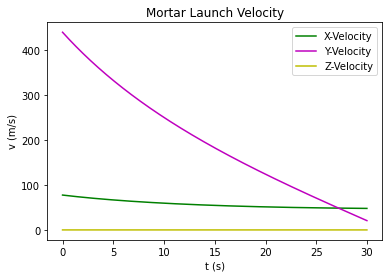

In [6]:
fig = plt.figure()
plt.title("Mortar Launch Velocity")
plt.plot(tarr,vxarray, 'g-', label='X-Velocity')
plt.plot(tarr,vyarray, 'm-', label='Y-Velocity')
plt.plot(tarr,vzarray, 'y-', label='Z-Velocity')
plt.xlabel('t (s)')
plt.ylabel('v (m/s)')
plt.legend()
plt.show()

This is where we get our first set of results printed out for our velocity values in the X,Y and yes even Z axis!

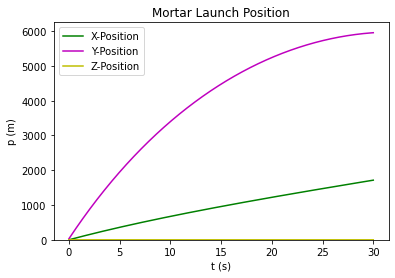

In [7]:
fig2 = plt.figure()
plt.title("Mortar Launch Position")
plt.plot(tarr,xarray, 'g-', label='X-Position')
plt.plot(tarr,yarray, 'm-', label='Y-Position')
plt.plot(tarr,zarray, 'y-', label='Z-Position')
plt.xlabel('t (s)')
plt.ylabel('p (m)')
plt.ylim(bottom=0)
plt.legend()
plt.show()

AND THIS is where we get our second graph displaying our position values in the X,Y, and Z axis!